In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

$$
-D \frac{u_{i-1} -2u_i + u_{i+1}}{(\Delta x)^2} = 1
$$

In [2]:
def chaleur(nx, a, b, D) :
    
    x = np.linspace(a, b, nx)
    dx = (b - a)/(nx - 1)
    M = -2 * np.eye(nx) + np.eye(nx, k = -1) + np.eye(nx, k = 1) 
    F = - (dx**2 / D)* np.ones(nx)
    
    U = solve(M, F)
    return x, U

In [3]:
Dmin, Dmax = 0.1, 10
a, b = 0, 1

nx = 1001

D = np.linspace(Dmin, Dmax, 11)

In [4]:
print(D)

[ 0.1   1.09  2.08  3.07  4.06  5.05  6.04  7.03  8.02  9.01 10.  ]


In [5]:
U = []

for d in D : 
    x, u = chaleur(nx, a, b, d)
    U.append(u)
    

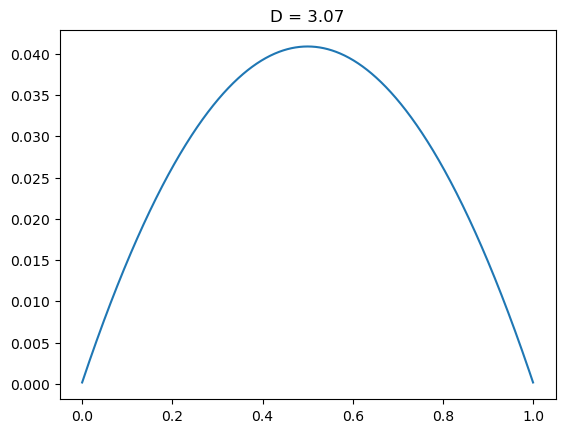

In [9]:
i = 3
plt.plot(x, U[i])
plt.title(f'D = {D[i]}')
plt.show()

In [7]:
from sklearn.decomposition import TruncatedSVD

In [8]:
svd = TruncatedSVD(n_components=3, n_iter=10, random_state=42)

In [9]:
svd.fit(U)

TruncatedSVD(n_components=3, n_iter=10, random_state=42)

In [10]:
print(svd.explained_variance_ratio_)

[1.00000000e+00 1.12988689e-31 1.65704512e-32]


In [12]:
V = svd.components_

In [19]:
V.shape

(3, 1001)

In [29]:
def chaleur_POD(nx, a, b, D, V) :
    
    x = np.linspace(a, b, nx)
    dx = (b - a)/(nx - 1)
    A = -2 * np.eye(nx) + np.eye(nx, k = -1) + np.eye(nx, k = 1)
    print(A.shape)
    F = - (dx**2 / D)* np.ones(nx)
    
    A_hat = V @ A @ V.T
    print(A_hat.shape)
    
    F_hat = V @ F
    alpha = solve(A_hat, F_hat)
    
    return x, V.T @ alpha

In [50]:
x, POD = chaleur_POD(nx, a, b, 1000, V)
x, FD = chaleur(nx, a, b, 1000)

(1001, 1001)
(3, 3)


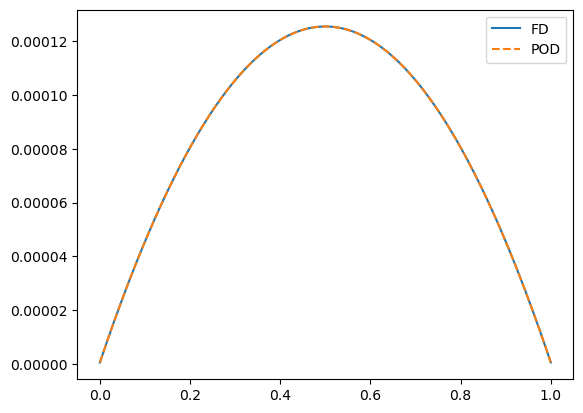

In [51]:
plt.plot(x, FD,label = 'FD')
plt.plot(x, POD, '--', label = 'POD')

plt.legend()
plt.show()

In [60]:
var = svd.explained_variance_ratio_

In [61]:
var_cum_sum = var.cumsum()

(0.0, 1.1)

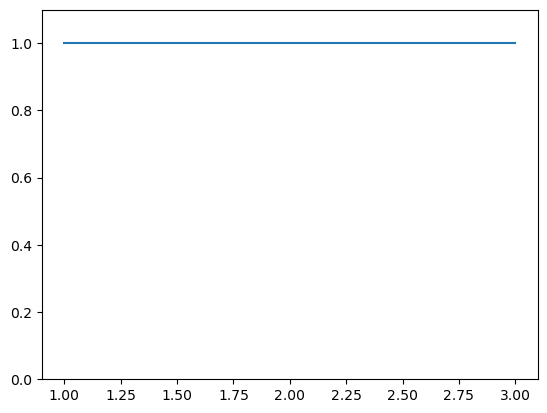

In [67]:
plt.plot(range(1, len(var_cum_sum) + 1), var_cum_sum)
plt.ylim([0, 1.1])